In [1]:
import os

In [5]:
test_PDB_dir = "ALL_TEST_PDB"
os.listdir(test_PDB_dir)[0]
pdb_test_path = os.path.join(test_PDB_dir, os.listdir(test_PDB_dir)[0])

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_2/Project/biopython_RIN/test_structures


In [138]:
from Bio import SeqIO
# remove all but Chain A

# remove hydrogens

outdir = test_PDB_dir+"_OUT"
os.makedirs(outdir, exist_ok=True)

protein_lengths = []
for pdb in os.listdir(test_PDB_dir):
    if pdb.split(".")[-1] != "pdb":
        continue
    # print(pdb)
    pdb_path = os.path.join(test_PDB_dir, pdb)
    out_path = os.path.join(outdir, pdb)

    !pdb_selchain -A {pdb_path} | pdb_delelem -H | pdb_delresname -HOH > {out_path}

    out_path = os.path.join(outdir, "APO_"+pdb)
    !pdb_selchain -A {pdb_path} | pdb_delelem -H | pdb_delhetatm > {out_path}


    structure = SeqIO.read(out_path, "pdb-atom")
    sequence_length = len(structure.seq)
    
    #print the length of the protein
    # print("Protein sequence length:", sequence_length)
    protein_lengths.append(sequence_length)

    # break
    
print("Average protein length:", sum(protein_lengths)/len(protein_lengths))

# check length of protein in pdb file

Average protein length: 267.5952380952381


In [142]:
from Bio import SeqIO
# remove all but Chain A

# remove hydrogens
test_PDB_dir = "KPC2_PDBs"

outdir = test_PDB_dir+"_OUT"
os.makedirs(outdir, exist_ok=True)

protein_lengths = []
for pdb in os.listdir(test_PDB_dir):
    if pdb.split(".")[-1] != "pdb":
        continue
    # print(pdb)
    pdb_path = os.path.join(test_PDB_dir, pdb)
    out_path = os.path.join(outdir, pdb)

    # !pdb_selchain -A {pdb_path} | pdb_delelem -H | pdb_delresname -HOH > {out_path}

    out_path = os.path.join(outdir, pdb)
    !pdb_selchain -A {pdb_path} | pdb_delelem -H | pdb_delhetatm | pdb_delres -:26 | pdb_delres -290: > {out_path}




    structure = SeqIO.read(out_path, "pdb-atom")
    sequence_length = len(structure.seq)
    
    #print the length of the protein
    # print("Protein sequence length:", sequence_length)
    protein_lengths.append(sequence_length)


    out_path = os.path.join(outdir, "LIG_"+pdb)
    !pdb_selchain -A {pdb_path} | pdb_delelem -H | pdb_selhetatm | pdb_delresname -HOH > {out_path}

    # break
    
print("Average protein length:", sum(protein_lengths)/len(protein_lengths))

# check length of protein in pdb file

Average protein length: 262.2142857142857


In [60]:
print("Average protein length:", sum(protein_lengths)/len(protein_lengths))

Average protein length: 256.49107142857144


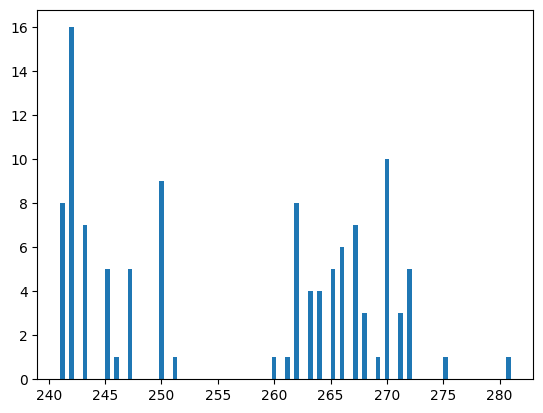

In [68]:
#plot protein lengths as histogram
import matplotlib.pyplot as plt
plt.hist(protein_lengths, bins=100)
plt.show()

In [39]:
# 

AttributeError: 'Model' object has no attribute 'delete_nonstd_atoms'

In [99]:
from modeller import *
from modeller.automodel import *

def fill_missing_residues(template_pdb, target_pdb, template_code, target_code):
    print("Filling missing residues in %s using %s" % (target_code, template_code))
    # Create a new MODELLER environment
    env = Environ()

    # Load the template and target PDB files
    mdl = Model(env, file=template_pdb)
    mdl2 = Model(env, file=target_pdb)

    # Get the sequence of the template and write to an alignment file
    aln = alignment(env)
    aln.append_model(mdl, align_codes=template_code)  # use pdb code
    aln.append_model(mdl2, align_codes=target_code)  # use pdb code
    aln.write(file='%s-%s.ali' % (template_code, target_code), alignment_format='PIR')

    # Create a comparative model
    a = automodel(env, alnfile='%s-%s.ali' % (template_code, target_code), 
                  knowns=(template_code,), sequence=target_code, assess_methods=(assess.DOPE, assess.GA341)) # use pdb code in knowns
    a.starting_model = 1
    a.ending_model = 1
    a.make()

template_pdb_code = "1YLJ"
template_pdb = "APO_"+template_pdb_code+".pdb"

for pdb in os.listdir(outdir):
    if pdb.startswith("APO"):
        target_pdb_code = pdb.split("_")[1].split(".")[0]
        print(target_pdb_code)

        target_pdb_path = os.path.join(outdir, pdb)
        template_pdb_path = os.path.join(outdir, template_pdb)
        print(target_pdb_path)

        fill_missing_residues(template_pdb_path, target_pdb_path, template_pdb_code, target_pdb_code)


3RXW
KPC2_PDBs_OUT/3RXW.pdb
Filling missing residues in 3RXW using 1YLJ
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead
pdbnam_____E> Filename for PDB code not found: 1YLJ
              Directories: 
              Extensions : :.atm:.pdb:.ent:.cif:.crd
              (Also tried prepending 'pdb', looking for .Z, .gz, .bz2, .7z, .xz,
              and trying PDB-style subdirectories - e.g. ab for pdb1abc.ent)



OSError: pdbnam_____E> Filename for PDB code not found: 1YLJ
              Directories: 
              Extensions : :.atm:.pdb:.ent:.cif:.crd
              (Also tried prepending 'pdb', looking for .Z, .gz, .bz2, .7z, .xz,
              and trying PDB-style subdirectories - e.g. ab for pdb1abc.ent)


In [102]:

from modeller import *
from modeller.automodel import *

def fill_missing_residues(template_pdb, target_pdb, template_code, target_code):
    print("Filling missing residues in %s using %s" % (target_code, template_code))
    # Create a new MODELLER environment
    env = Environ()
    env.io.atom_files_directory = [outdir]
    # Load the template and target PDB files
    mdl = Model(env, file=template_pdb)
    mdl2 = Model(env, file=target_pdb)

    # Get the sequence of the template and write to an alignment file
    aln = alignment(env)
    aln.append_model(mdl, align_codes=template_code)  # use pdb code
    aln.append_model(mdl2, align_codes=target_code)  # use pdb code
    aln.write(file='%s-%s.ali' % (template_code, target_code), alignment_format='PIR')

    # Create a comparative model
    a = automodel(env, alnfile='%s-%s.ali' % (template_code, target_code), 
                  knowns=(template_code,), sequence=target_code, assess_methods=(assess.DOPE, assess.GA341)) # use pdb code in knowns
    a.starting_model = 1
    a.ending_model = 1
    a.make()

template_pdb_code = "1YLJ"
template_pdb = "APO_"+template_pdb_code+".pdb"

for pdb in os.listdir(outdir):
    if pdb.startswith("APO"):
        target_pdb_code = pdb.split("_")[1].split(".")[0]
        print(target_pdb_code)

        target_pdb_path = os.path.join(outdir, pdb)
        template_pdb_path = os.path.join(outdir, template_pdb)
        print(target_pdb_path)

        fill_missing_residues(template_pdb_path, target_pdb_path, template_pdb_code, target_pdb_code)


7UTB
KPC2_PDBs_OUT/APO_7UTB.pdb
Filling missing residues in 7UTB using 1YLJ
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead
pdbnam_____E> Filename for PDB code not found: 1YLJ
              Directories: KPC2_PDBs_OUT
              Extensions : :.atm:.pdb:.ent:.cif:.crd
              (Also tried prepending 'pdb', looking for .Z, .gz, .bz2, .7z, .xz,
              and trying PDB-style subdirectories - e.g. ab for pdb1abc.ent)



OSError: pdbnam_____E> Filename for PDB code not found: 1YLJ
              Directories: KPC2_PDBs_OUT
              Extensions : :.atm:.pdb:.ent:.cif:.crd
              (Also tried prepending 'pdb', looking for .Z, .gz, .bz2, .7z, .xz,
              and trying PDB-style subdirectories - e.g. ab for pdb1abc.ent)


In [141]:
from modeller import *
from modeller.automodel import *

os.makedirs("MODELLER", exist_ok=True)


def fill_missing_residues(template_pdb, target_pdb, template_code, target_code):
    print("Filling missing residues in %s using %s" % (target_code, template_code))
    # Create a new MODELLER environment
    env = Environ()
    env.io.atom_files_directory = [outdir]

    # Load the template and target PDB files
    mdl = Model(env, file=template_pdb)
    mdl2 = Model(env, file=target_pdb)

    # Get the sequence of the template and write to an alignment file
    aln = alignment(env)
    aln.append_model(mdl, align_codes=template_code)  # use pdb code
    aln.append_model(mdl2, align_codes=target_code)  # use pdb code
    aln.write(file='%s-%s.ali' % (template_code, target_code), alignment_format='PIR')

    # Create a comparative model
    a = automodel(env, alnfile='%s-%s.ali' % (template_code, target_code), 
                  knowns=(template_code,), sequence=target_code, assess_methods=(assess.DOPE, assess.GA341)) # use pdb code in knowns
    a.starting_model = 1
    a.ending_model = 1
    a.make()

template_pdb_code = "1YLJ"
template_pdb = template_pdb_code+".pdb"


for pdb in os.listdir(outdir):
    if pdb.startswith("LIG") or pdb.startswith("."):
        continue
    target_pdb_code = pdb.split(".")[0]
    print(target_pdb_code)

    target_pdb_path = os.path.join(outdir, pdb)
    template_pdb_path = os.path.join(outdir, template_pdb)
    print(target_pdb_path)

    fill_missing_residues(template_pdb, pdb, template_pdb_code, target_pdb_code)


3RXW
KPC2_PDBs_OUT/3RXW.pdb
Filling missing residues in 3RXW using 1YLJ
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
read_to_681_> topology.submodel read from topology file:        3
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total number of restraint

TimeoutError: [Errno 60] Operation timed out

In [140]:
from modeller import *
from modeller.automodel import *

os.makedirs("MODELLER", exist_ok=True)

test_PDB_dir = "KPC2_PDBs"


def fill_missing_residues(template_pdb, target_pdb, template_code, target_code):
    print("Filling missing residues in %s using %s" % (target_code, template_code))
    # Create a new MODELLER environment
    env = Environ()
    env.io.atom_files_directory = [test_PDB_dir]

    # Load the template and target PDB files
    mdl = Model(env, file=template_pdb)
    mdl2 = Model(env, file=target_pdb)

    # Get the sequence of the template and write to an alignment file
    aln = alignment(env)
    aln.append_model(mdl, align_codes=template_code)  # use pdb code
    aln.append_model(mdl2, align_codes=target_code)  # use pdb code
    aln.write(file='%s-%s.ali' % (template_code, target_code), alignment_format='PIR')

    # Create a comparative model
    a = automodel(env, alnfile='%s-%s.ali' % (template_code, target_code), 
                  knowns=(template_code,), sequence=target_code, assess_methods=(assess.DOPE, assess.GA341)) # use pdb code in knowns
    a.starting_model = 1
    a.ending_model = 1
    a.make()

template_pdb_code = "1YLJ"
template_pdb = template_pdb_code+".pdb"


for pdb in os.listdir(test_PDB_dir):
    if pdb.startswith("LIG") or pdb.startswith("."):
        continue
    target_pdb_code = pdb.split(".")[0]
    print(target_pdb_code)

    target_pdb_path = os.path.join(test_PDB_dir, pdb)
    template_pdb_path = os.path.join(test_PDB_dir, template_pdb)
    print(target_pdb_path)

    fill_missing_residues(template_pdb, pdb, template_pdb_code, target_pdb_code)


3RXW
KPC2_PDBs/3RXW.pdb
Filling missing residues in 3RXW using 1YLJ
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE
read_to_681_> topology.submodel read from topology file:        3
mdtrsr__446W> A potential that relies on one protein is used, yet you have at
              least one known structure available. MDT, not library, potential is used.
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies
condens_443_> Restraints marked for deletion were removed.
              Total number of restraints be

ModellerError: rdpdb___303E> No atoms were read from the specified input PDB file, since the starting residue number and/or chain id in MODEL_SEGMENT (or the alignment file header) was not found; requested starting position: residue number " FIRST", chain " @"; atom file name:  KPC2_PDBs/KPC_2_surface.pse

In [130]:
# from modeller import *
# from modeller.automodel import *

# os.makedirs("MODELLER", exist_ok=True)

# def fill_missing_residues(template_pdb, target_pdb, template_code, target_code):
#     print("Filling missing residues in %s using %s" % (target_code, template_code))
#     # Create a new MODELLER environment
#     env = Environ()
#     env.io.atom_files_directory = [outdir]

#     # Load the template and target PDB files
#     mdl = Model(env, file=template_pdb)
#     mdl2 = Model(env, file=target_pdb)

#     # Get the sequence of the template and write to an alignment file
#     aln = alignment(env)
#     aln.append_model(mdl, align_codes=template_code)  # use pdb code
#     aln.append_model(mdl2, align_codes=target_code)  # use pdb code
    
#     # Define output directory for MODELLER results
#     modeller_outdir = "MODELLER"
#     os.makedirs(modeller_outdir, exist_ok=True)

#     # Write alignment file in modeller_outdir
#     aln.write(file=os.path.join(modeller_outdir, '%s-%s.ali' % (template_code, target_code)), alignment_format='PIR')

#     # Create a comparative model
#     a = automodel(env, alnfile=os.path.join(modeller_outdir, '%s-%s.ali' % (template_code, target_code)), 
#                   knowns=(template_code,), sequence=os.path.join(modeller_outdir, target_code), assess_methods=(assess.DOPE, assess.GA341)) # use pdb code in knowns
#     a.starting_model = 1
#     a.ending_model = 1
#     a.make()


# template_pdb_code = "1YLJ"
# template_pdb = template_pdb_code+".pdb"


# for pdb in os.listdir(outdir):
#     if pdb.startswith("LIG") or pdb.startswith("."):
#         continue
#     target_pdb_code = pdb.split(".")[0]
#     print(target_pdb_code)

#     target_pdb_path = os.path.join(outdir, pdb)
#     template_pdb_path = os.path.join(outdir, template_pdb)
#     print(target_pdb_path)

#     fill_missing_residues(template_pdb, pdb, template_pdb_code, target_pdb_code)


3RXW
KPC2_PDBs_OUT/3RXW.pdb
Filling missing residues in 3RXW using 1YLJ
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
automodel__W> The class 'automodel' is deprecated; use 'AutoModel' instead
read_al_373E> Protein specified in ALIGN_CODES(i) was not found
              in the alignment file; ALIGN_CODES(       2) =  MODELLER/3RXW


ModellerError: read_al_373E> Protein specified in ALIGN_CODES(i) was not found in the alignment file; ALIGN_CODES(       2) =  MODELLER/3RXW

In [125]:
os.getcwd()

'/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_2/Project/biopython_RIN/test_structures'